# Installing the WordCloud

In [1]:
!pip install wordcloud

# Installing the Spacy

In [2]:
!pip install -U spacy 
  

# Installing the scikit-learn

In [3]:
!pip install -U scikit-learn

In [4]:
!pip install --upgrade scikit-learn



# Importing libraries

In [5]:
import re
import string
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [6]:
df = pd.read_csv("fake_job_postings.csv")

In [7]:
df.head(2)

job_id                                      title          location  \
0       1                           Marketing Intern  US, NY, New York   
1       2  Customer Service - Cloud Video Production    NZ, , Auckland   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   

  required_education                   industry          function  fraudulent  
0                NaN                        NaN         Marketing           0  
1                NaN  Marketing and Advertising  Customer Service           0

# Shape of dataset

In [8]:
df.shape

(17880, 18)

# Information regarding Dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

# Finding the number of null values in each column

In [10]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

# Describing the dataset

In [11]:
df.describe()

job_id  telecommuting  has_company_logo  has_questions  \
count  17880.000000   17880.000000      17880.000000   17880.000000   
mean    8940.500000       0.042897          0.795302       0.491723   
std     5161.655742       0.202631          0.403492       0.499945   
min        1.000000       0.000000          0.000000       0.000000   
25%     4470.750000       0.000000          1.000000       0.000000   
50%     8940.500000       0.000000          1.000000       0.000000   
75%    13410.250000       0.000000          1.000000       1.000000   
max    17880.000000       1.000000          1.000000       1.000000   

         fraudulent  
count  17880.000000  
mean       0.048434  
std        0.214688  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

# Name of all columns 

In [12]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

# Datatype of each column

In [13]:
df.dtypes


job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

# Finding number of unique values

In [14]:
df.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

# Count of non null values 

In [15]:
df.count()

job_id                 17880
title                  17880
location               17534
department              6333
salary_range            2868
company_profile        14572
description            17879
requirements           15185
benefits               10670
telecommuting          17880
has_company_logo       17880
has_questions          17880
employment_type        14409
required_experience    10830
required_education      9775
industry               12977
function               11425
fraudulent             17880
dtype: int64

#   
  
   

In [16]:
categories=['telecommuting','has_company_logo','has_questions',
            'employment_type','required_experience','required_education','industry','function','fraudulent']

In [17]:
for i in categories:
     x=df[i].value_counts()
     print (x.to_frame())
    

   telecommuting
0          17113
1            767
   has_company_logo
1             14220
0              3660
   has_questions
0           9088
1           8792
           employment_type
Full-time            11620
Contract              1524
Part-time              797
Temporary              241
Other                  227
                  required_experience
Mid-Senior level                 3809
Entry level                      2697
Associate                        2297
Not Applicable                   1116
Director                          389
Internship                        381
Executive                         141
                                   required_education
Bachelor's Degree                                5145
High School or equivalent                        2080
Unspecified                                      1397
Master's Degree                                   416
Associate Degree                                  274
Certification                                   

# Removing undesired columns & nan 


In [18]:
df.function.fillna(df.department,inplace=True)
df.drop(columns=['job_id','salary_range','department'],inplace=True)

In [19]:
df.head(2)

title          location  \
0                           Marketing Intern  US, NY, New York   
1  Customer Service - Cloud Video Production    NZ, , Auckland   

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   

  required_education                   industry          function  fraudulent  
0                NaN                        NaN         Marketing           0  
1                NaN  Marketing and Advertising  Customer Service           0

# 

# handling missing values for text data and categorical data


In [20]:
text=['title','benefits','company_profile','location','description','requirements','fraudulent']

categ=['employment_type','required_experience','required_education','industry',
       'function','telecommuting','has_company_logo','has_questions','fraudulent']

In [21]:
categ_cols=df[categ].fillna('None')
categ_cols

employment_type required_experience required_education  \
0               Other          Internship               None   
1           Full-time      Not Applicable               None   
2                None                None               None   
3           Full-time    Mid-Senior level  Bachelor's Degree   
4           Full-time    Mid-Senior level  Bachelor's Degree   
...               ...                 ...                ...   
17875       Full-time    Mid-Senior level               None   
17876       Full-time    Mid-Senior level  Bachelor's Degree   
17877       Full-time                None               None   
17878        Contract      Not Applicable       Professional   
17879       Full-time    Mid-Senior level               None   

                        industry              function  telecommuting  \
0                           None             Marketing              0   
1      Marketing and Advertising      Customer Service              0   
2                           None                  None              0   
3              Computer Software                 Sales              0   
4         Hospital & Health Care  Health Care Provider              0   
...                          ...                   ...            ...   
17875          Computer Software                 Sales              0   
17876                   Internet   Accounting/Auditing              0   
17877                       None                  None              0   
17878             Graphic Design                Design              0   
17879          Computer Software           Engineering              0   

       has_company_logo  has_questions  fraudulent  
0                     1              0           0  
1                     1              0           0  
2                     1              0           0  
3                     1              0           0  
4                     1              1           0  
...                 ...            ...         ...  
17875                 1              1           0  
17876                 1              1           0  
17877                 0              0           0  
17878                 0              1           0  
17879                 1              1           0  

[17880 rows x 9 columns]

# 

In [22]:
#filling nan in text data
txt_cols=df[text].fillna(' ')
txt_cols

title  \
0                                       Marketing Intern   
1              Customer Service - Cloud Video Production   
2                Commissioning Machinery Assistant (CMA)   
3                      Account Executive - Washington DC   
4                                    Bill Review Manager   
...                                                  ...   
17875                   Account Director - Distribution    
17876                                 Payroll Accountant   
17877  Project Cost Control Staff Engineer - Cost Con...   
17878                                   Graphic Designer   
17879                         Web Application Developers   

                                                benefits  \
0                                                          
1      What you will get from usThrough being part of...   
2                                                          
3      Our culture is anything but corporate—we have ...   
4                                  Full Benefits Offered   
...                                                  ...   
17875  What can you expect from us?We have an open cu...   
17876  Health &amp; WellnessMedical planPrescription ...   
17877                                                      
17878  Competitive salary (compensation will be based...   
17879                                                      

                                         company_profile  \
0      We're Food52, and we've created a groundbreaki...   
1      90 Seconds, the worlds Cloud Video Production ...   
2      Valor Services provides Workforce Solutions th...   
3      Our passion for improving quality of life thro...   
4      SpotSource Solutions LLC is a Global Human Cap...   
...                                                  ...   
17875  Vend is looking for some awesome new talent to...   
17876  WebLinc is the e-commerce platform and service...   
17877  We Provide Full Time Permanent Positions for m...   
17878                                                      
17879  Vend is looking for some awesome new talent to...   

                   location  \
0          US, NY, New York   
1            NZ, , Auckland   
2             US, IA, Wever   
3        US, DC, Washington   
4        US, FL, Fort Worth   
...                     ...   
17875       CA, ON, Toronto   
17876  US, PA, Philadelphia   
17877       US, TX, Houston   
17878         NG, LA, Lagos   
17879     NZ, N, Wellington   

                                             description  \
0      Food52, a fast-growing, James Beard Award-winn...   
1      Organised - Focused - Vibrant - Awesome!Do you...   
2      Our client, located in Houston, is actively se...   
3      THE COMPANY: ESRI – Environmental Systems Rese...   
4      JOB TITLE: Itemization Review ManagerLOCATION:...   
...                                                  ...   
17875  Just in case this is the first time you’ve vis...   
17876  The Payroll Accountant will focus primarily on...   
17877  Experienced Project Cost Control Staff Enginee...   
17878  Nemsia Studios is looking for an experienced v...   
17879  Who are we?Vend is an award winning web based ...   

                                            requirements  fraudulent  
0      Experience with content management systems a m...           0  
1      What we expect from you:Your key responsibilit...           0  
2      Implement pre-commissioning and commissioning ...           0  
3      EDUCATION: Bachelor’s or Master’s in GIS, busi...           0  
4      QUALIFICATIONS:RN license in the State of Texa...           0  
...                                                  ...         ...  
17875  To ace this role you:Will eat comprehensive St...           0  
17876  - B.A. or B.S. in Accounting- Desire to have f...           0  
17877  At least 12 years professional experience.Abil...           0  
17878  1. Must be fluent in the latest versions of Co...           0  
17879  We wan

#


# Getting country names from Location

In [23]:
categ_cols['country'] = txt_cols['location'].apply(lambda x:x.split(',')[0])
countries = categ_cols['country'].value_counts().to_frame()
countries

country
US    10656
GB     2384
GR      940
CA      457
DE      383
..      ...
SI        1
CO        1
SD        1
UG        1
KH        1

[91 rows x 1 columns]

**It show's that there are 91 countries**

# 


# Exploratory Data Analysis 


In [24]:
df['fraudulent'].value_counts().to_frame()

fraudulent
0       17014
1         866

# 

# Ploting pie chart to visualize it

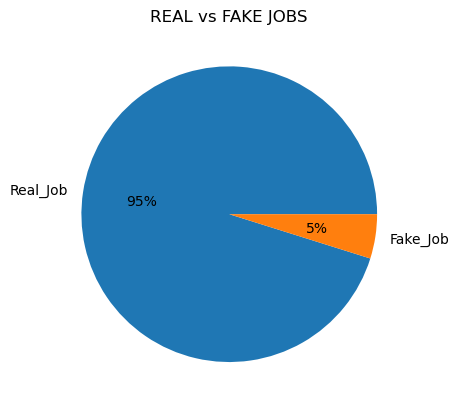

In [25]:
label = ['Real_Job','Fake_Job']
plt.title("REAL vs FAKE JOBS")
plt.pie(df['fraudulent'].value_counts(),labels=label,autopct='%.0f%%')
plt.show()

# 



# Ploting count graphs b/w different data features and Fake job counts

In [26]:
fakejobs=categ_cols[categ_cols['fraudulent']==1]
realjobs=categ_cols[categ_cols['fraudulent']==0]

In [27]:
fakejobs.value_counts().sum()

866

Text(0.5, 0, 'Function')

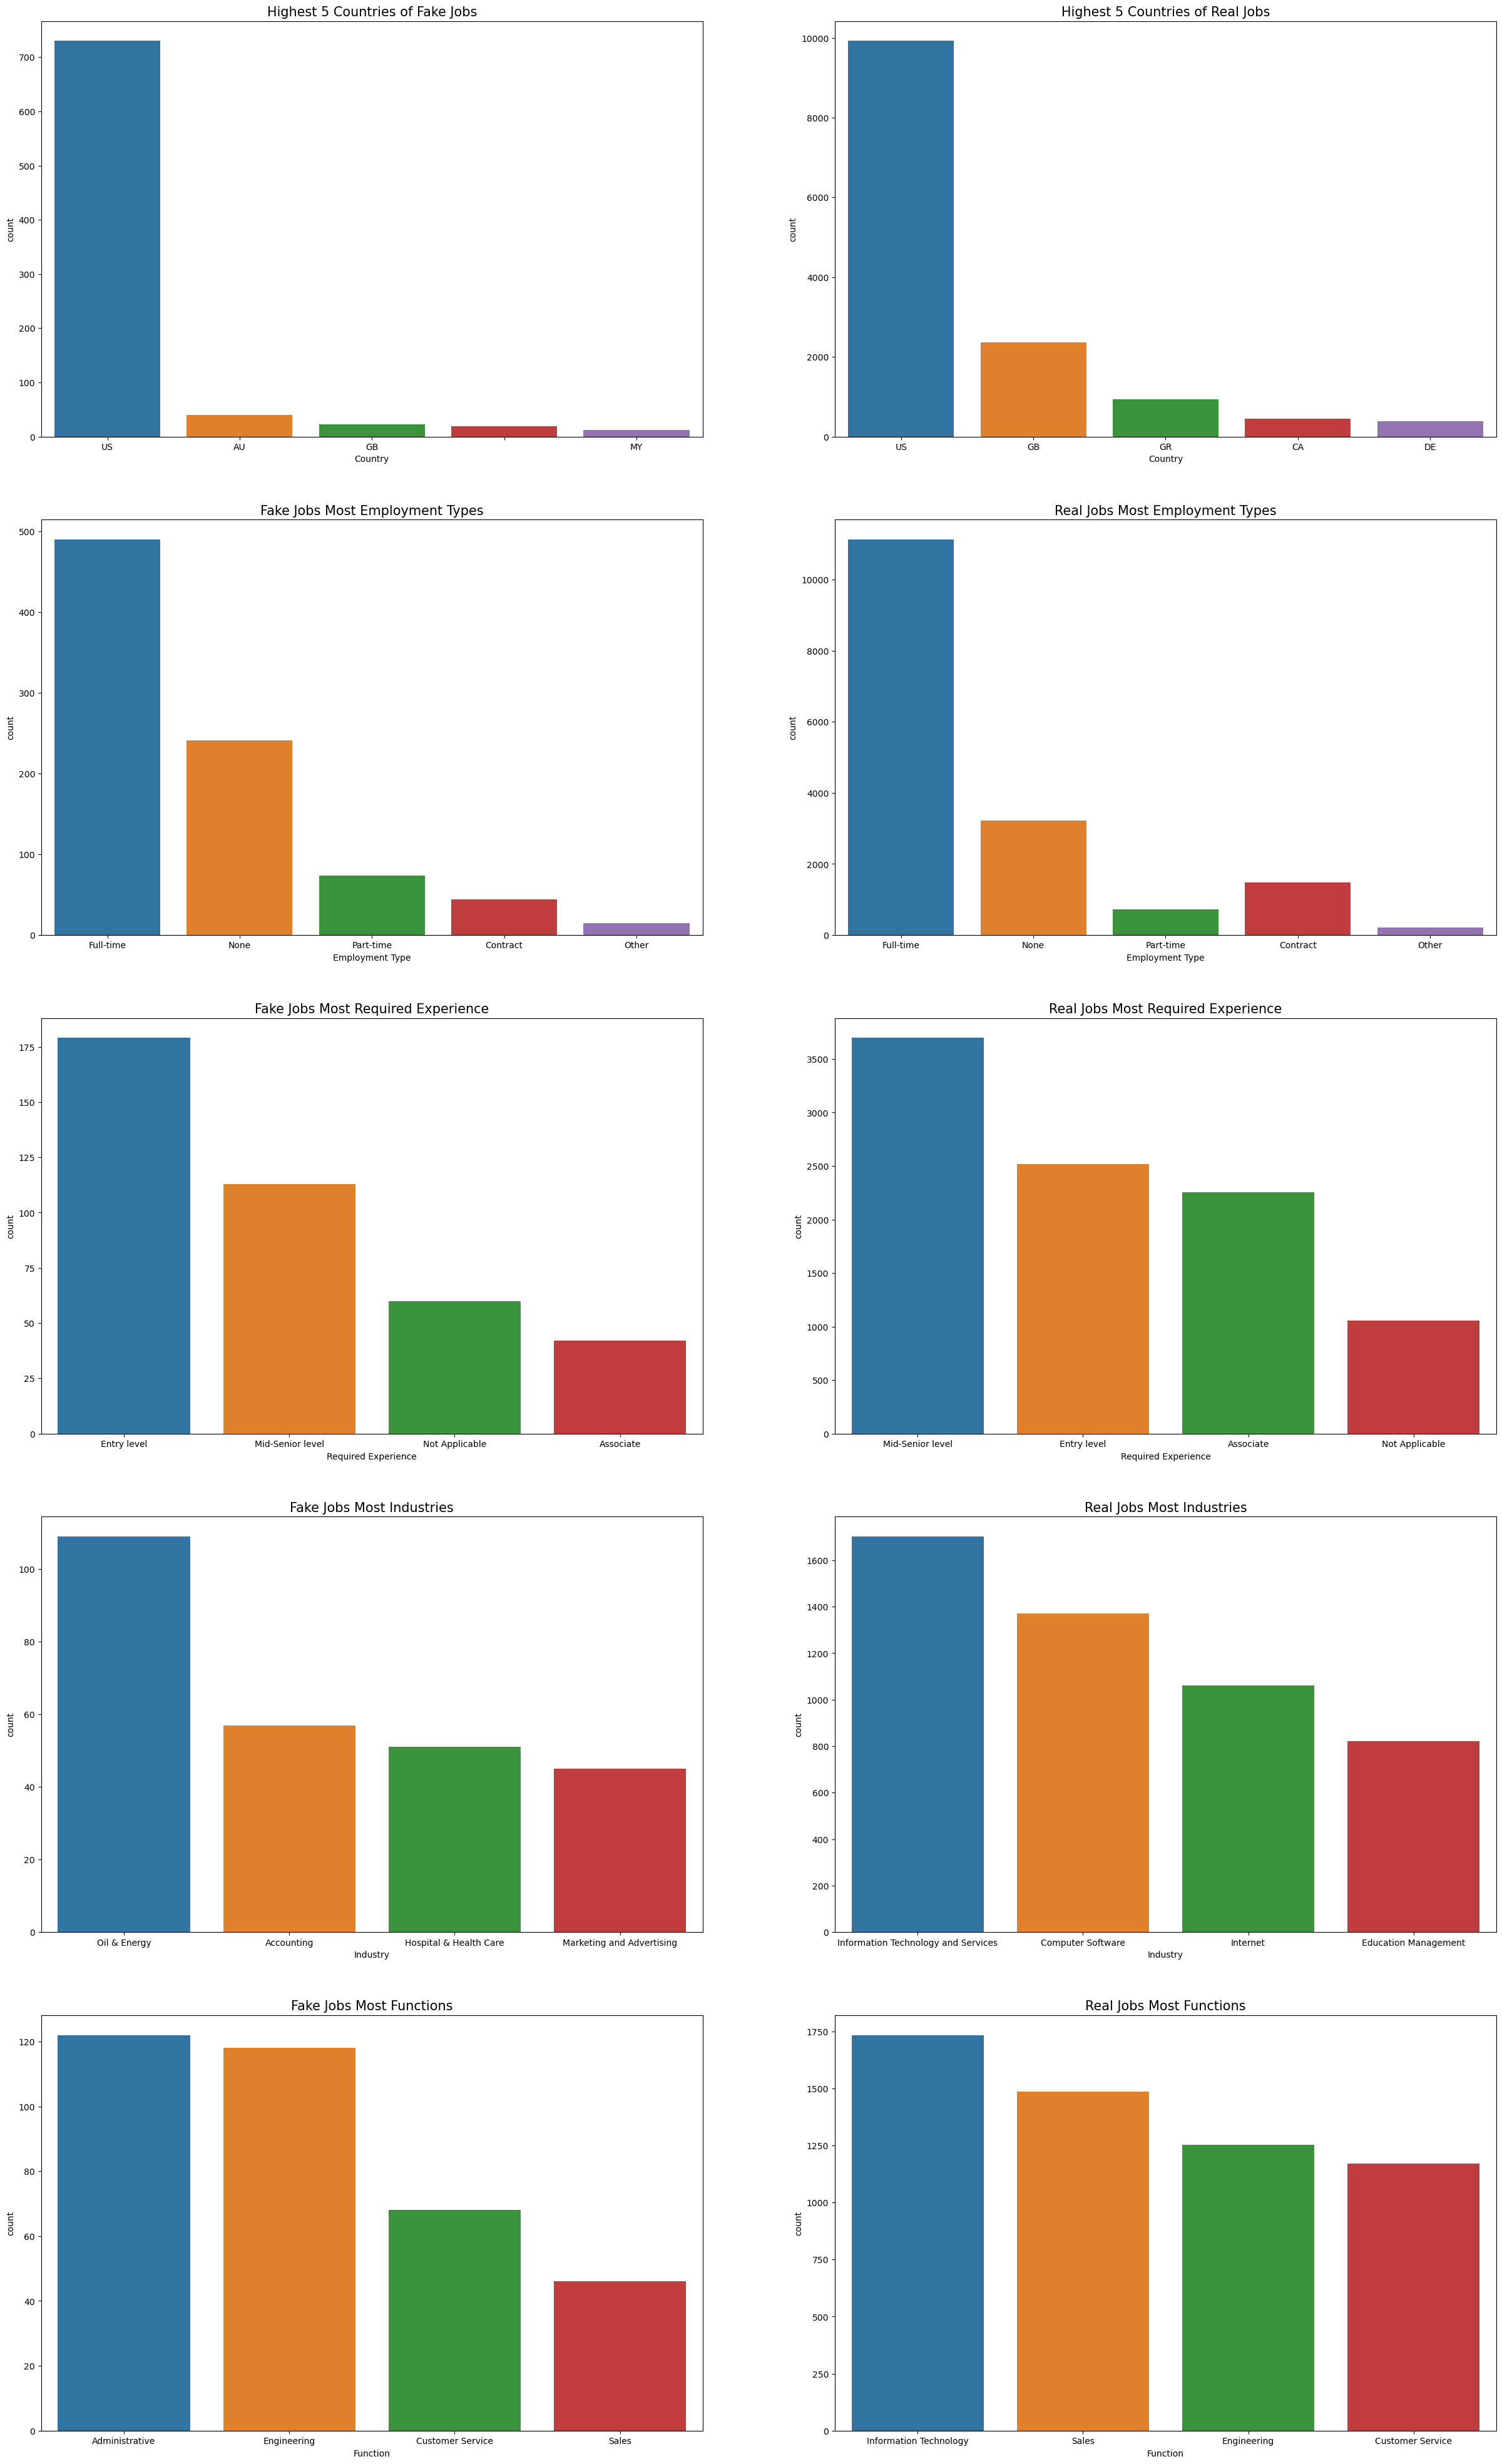

In [28]:
fig,axes=plt.subplots(5,2,figsize=(30,50))

sns.countplot(x=fakejobs['country'],order = fakejobs['country'].value_counts()[:5].index,ax=axes[0,0])
sns.countplot(x=realjobs['country'],order = realjobs['country'].value_counts()[:5].index,ax=axes[0,1])
axes[0,0].set_title('Highest 5 Countries of Fake Jobs',fontsize=15)
axes[0,1].set_title('Highest 5 Countries of Real Jobs',fontsize=15)
axes[0,0].set_xlabel('Country')
axes[0,1].set_xlabel('Country')


sns.countplot(x=fakejobs['employment_type'],order = fakejobs['employment_type'].value_counts()[:5].index,ax=axes[1,0])
sns.countplot(x=realjobs['employment_type'],order = fakejobs['employment_type'].value_counts()[:5].index,ax=axes[1,1])
axes[1,0].set_title('Fake Jobs Most Employment Types',fontsize=15)
axes[1,1].set_title('Real Jobs Most Employment Types',fontsize=15)
axes[1,0].set_xlabel('Employment Type')
axes[1,1].set_xlabel('Employment Type')



sns.countplot(x=fakejobs['required_experience'],order = fakejobs['required_experience'].value_counts()[1:5].index,ax=axes[2,0])
sns.countplot(x=realjobs['required_experience'],order = realjobs['required_experience'].value_counts()[1:5].index,ax=axes[2,1])
axes[2,0].set_title('Fake Jobs Most Required Experience',fontsize=15)
axes[2,1].set_title('Real Jobs Most Required Experience',fontsize=15)
axes[2,0].set_xlabel('Required Experience')
axes[2,1].set_xlabel('Required Experience')



sns.countplot(x=fakejobs['industry'],order = fakejobs['industry'].value_counts()[1:5].index,ax=axes[3,0])
sns.countplot(x=realjobs['industry'],order = realjobs['industry'].value_counts()[1:5].index,ax=axes[3,1])
axes[3,0].set_title('Fake Jobs Most Industries',fontsize=15)
axes[3,1].set_title('Real Jobs Most Industries',fontsize=15)
axes[3,0].set_xlabel('Industry')
axes[3,1].set_xlabel('Industry')



sns.countplot(x=fakejobs['function'],order = fakejobs['function'].value_counts()[1:5].index,ax=axes[4,0])
sns.countplot(x=realjobs['function'],order = realjobs['function'].value_counts()[1:5].index,ax=axes[4,1])
axes[4,0].set_title('Fake Jobs Most Functions',fontsize=15)
axes[4,1].set_title('Real Jobs Most Functions',fontsize=15)
axes[4,0].set_xlabel('Function')
axes[4,1].set_xlabel('Function')


# 




**For telecommuting,has_company_logo,has_questions**

Text(0.5, 1.0, 'Has Questions?')

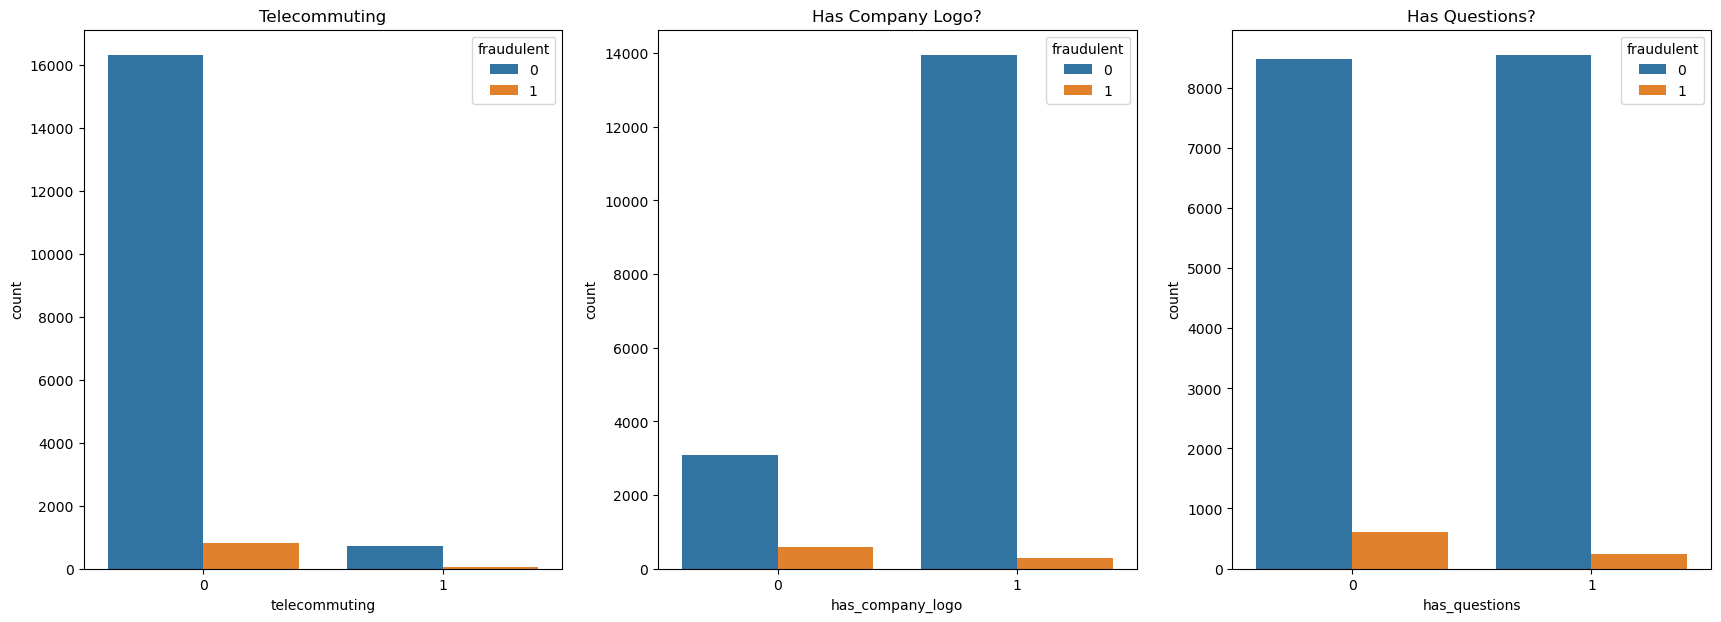

In [29]:
fig,axes=plt.subplots(1,3,figsize=(21,7))
sns.countplot(x='telecommuting', data=categ_cols, hue='fraudulent',ax=axes[0]) 
sns.countplot(x='has_company_logo', data=categ_cols, hue='fraudulent',ax=axes[1]) 
sns.countplot(x='has_questions', data=categ_cols, hue='fraudulent',ax=axes[2]) 

axes[0].set_title('Telecommuting')
axes[1].set_title('Has Company Logo?')
axes[2].set_title('Has Questions?')


# 


# Top 10 industries based on required experience

In [30]:
exp_list=['Executive','Associate','Director','Mid-Senior level']
exp_data=categ_cols.loc[categ_cols['required_experience'].isin(exp_list)]

In [31]:
exp_data_indus=exp_data.groupby('industry')['required_experience'].value_counts(ascending=False).to_frame()
exp_data_indus.head(30)

required_experience
industry                required_experience                     
Accounting              Associate                             25
                        Mid-Senior level                      14
                        Director                               1
                        Executive                              1
Airlines/Aviation       Mid-Senior level                      23
                        Associate                             10
                        Executive                              3
                        Director                               1
Animation               Associate                              1
Apparel & Fashion       Mid-Senior level                      36
                        Associate                              9
                        Director                               6
Architecture & Planning Mid-Senior level                       3
                        Associate                              2
Automotive              Mid-Senior level                      32
                        Associate                             21
                        Director                               1
                        Executive                              1
Aviation & Aerospace    Mid-Senior level                       8
                        Associate                              5
                        Director                               5
Banking                 Associate                             32
                        Mid-Senior level                      29
                        Director                               2
                        Executive                              1
Biotechnology           Associate                             14
                        Mid-Senior level                      11
                        Director                               1
Broadcast Media         Mid-Senior level                      43
                        Associate                              4

# 


# Function required experiance

In [32]:
exp_data_fun=exp_data.groupby('function')['required_experience'].value_counts(ascending=False).to_frame()
exp_data_fun.head(30)

required_experience
function              required_experience                     
Account Management    Mid-Senior level                       1
Accounting/Auditing   Associate                             58
                      Mid-Senior level                      54
                      Director                               5
                      Executive                              3
Ad Sales              Director                               1
Administrative        Associate                            109
                      Mid-Senior level                      32
                      Executive                              6
                      Director                               3
Advertising           Mid-Senior level                      30
                      Associate                             17
                      Director                               4
All                   Mid-Senior level                       1
Apps                  Executive                              1
Art Studio            Associate                              1
Art/Creative          Mid-Senior level                      40
                      Associate                             23
                      Director                               5
Broadcasting          Associate                              1
Business              Mid-Senior level                       1
Business Analyst      Mid-Senior level                      26
                      Associate                             24
                      Director                               3
Business Development  Mid-Senior level                      59
                      Associate                             55
                      Director                              15
                      Executive                              6
Business Developmment Associate                              1
CSD Technology        Mid-Senior level                       1

# 



# Countries with Employment Types

In [33]:
categ_cols.groupby('country')['employment_type'].value_counts(ascending=False).to_frame().head(50)

employment_type
country employment_type                 
        None                         214
        Full-time                     96
        Part-time                     14
        Contract                      12
        Other                          8
        Temporary                      2
AE      Full-time                     34
        None                          20
AL      None                           1
AM      Full-time                      2
AR      None                           5
        Full-time                      4
AT      None                           7
        Full-time                      6
        Contract                       1
AU      Full-time                    136
        Part-time                     37
        None                          28
        Contract                       6
        Other                          4
        Temporary                      3
BD      Full-time                      2
BE      Full-time                    107
        None                           5
        Temporary                      3
        Other                          2
BG      Full-time                     17
BH      None                           9
BR      Full-time                     27
        None                           6
        Contract                       2
        Other                          1
BY      Full-time                      5
        None                           4
CA      Full-time                    300
        None                          78
        Contract                      43
        Part-time                     30
        Other                          4
        Temporary                      2
CH      Full-time                     13
        None                           1
        Other                          1
CL      None                           2
CM      Full-time                      1
CN      Full-time                     10
        Contract                       3
        None                           2
CO      None                           1
CY      None                           6

#




# Industries and Required Education


In [34]:
categ_cols.groupby('industry')['required_education'].value_counts(ascending=False).to_frame().head(50)


required_education
industry                       required_education                                   
Accounting                     None                                               71
                               Bachelor's Degree                                  35
                               High School or equivalent                          29
                               Unspecified                                        15
                               Certification                                       4
                               Master's Degree                                     2
                               Professional                                        2
                               Some College Coursework Completed                   1
Airlines/Aviation              None                                               33
                               Bachelor's Degree                                  22
                               Unspecified                                         4
                               High School or equivalent                           3
                               Master's Degree                                     1
Alternative Dispute Resolution Vocational                                          1
Animation                      None                                                3
                               Certification                                       1
                               Unspecified                                         1
Apparel & Fashion              None                                               44
                               Bachelor's Degree                                  34
                               Unspecified                                         9
                               Associate Degree                                    5
                               High School or equivalent                           3
                               Master's Degree                                     1
                               Vocational                                          1
Architecture & Planning        Bachelor's Degree                                   6
                               None                                                4
Automotive                     High School or equivalent                          30
                               Bachelor's Degree                                  28
                               Unspecified                                        26
                               None                                               25
                               Associate Degree                                    8
                               Master's Degree                                     1
                               Some College Coursework Completed                   1
                               Vocational                                          1
Aviation & Aerospace           Bachelor's Degree                                  10
                               None                                                6
                               Master's Degree                                     5
                               Professional                                        2
                               Unspecified                                         1
Banking                        High School or equivalent                          33
                               Bachelor's Degree                                  21
                               None                                               13
                               Unspecified                                         6
                               Master's Degree                                     5
                               Professional                                        3
                               Associate Degree                        

# 





# 





# Exploring Text

In [35]:
cols_to_remove=['location']
txt_cols.drop(columns=cols_to_remove,inplace=True) 
# As we used Country in location column as a category data


In [36]:
txt_cols.head(2)

title  \
0                           Marketing Intern   
1  Customer Service - Cloud Video Production   

                                            benefits  \
0                                                      
1  What you will get from usThrough being part of...   

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   

                                        requirements  fraudulent  
0  Experience with content management systems a m...           0  
1  What we expect from you:Your key responsibilit...           0

# 

**Cleaning Text & Removing Stopwords and Stemming**

In [37]:
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to C:\Users\DEVANSH
[nltk_data]     PATEL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
stemmer=PorterStemmer()
stop=set(stopwords.words('english'))

In [39]:
def column_clean(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z\s*]','',text)
    text=text.split()
    text=[stemmer.stem(word) for word in text if word not in set(stopwords.words('english'))]
    return (text)

In [40]:
# Splitting Text Data to Fraud or Not Fraud
txt_fraud=txt_cols[txt_cols['fraudulent']==1]
txt_not_fraud=txt_cols[txt_cols['fraudulent']==0]

# 




**Applying Cleaning on Title**

In [41]:
txt_fraud['title']=txt_fraud['title'].apply(column_clean)
txt_not_fraud['title']=txt_not_fraud['title'].apply(column_clean)


In [42]:
def combine(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

fraud_titles = txt_fraud['title'].apply(combine)
not_fraud_titles = txt_not_fraud['title'].apply(combine)

In [43]:
fraud_titles

98                      ice technician
144                        forward cap
173      technician instrument control
180                        sale execut
215             ice technician mt poso
                     ...              
17827    student posit parttim fulltim
17828                      sale associ
17829                  android develop
17830                     payrol clerk
17831                   furnitur mover
Name: title, Length: 866, dtype: object

In [44]:
#Converting into List

fraud_titles_corpus=fraud_titles.values.tolist()
not_fraud_titles_corpus=not_fraud_titles.values.tolist()


In [45]:
fraud_titles_corpus

['ice technician',
 'forward cap',
 'technician instrument control',
 'sale execut',
 'ice technician mt poso',
 'financ autocar sale',
 'admin assist receptionist',
 'technolog consult outsid sale',
 'senior engin product manag',
 'qualiti improv manag',
 'lead mechan engin',
 'director strategi',
 'ust test technician ii',
 'director strategi',
 'health safeti profession',
 'ust test technician ii',
 'project manag engin',
 'technician instrument control',
 'project control technician',
 'technic custom support associ',
 'servic associ',
 'executivehead chef',
 'health environment profession',
 'execut sou chef',
 'administr assist',
 'administr assist',
 'administr assist',
 'big data engin',
 'health environment profession',
 'small busi benefit consult',
 'clinic educ manag surgic servic',
 'data entri admincler posit work home',
 'informatica etl tester',
 'job vacanc montcalm luxuri hotel london',
 'sap support advisor',
 'hse manag',
 'administr assist',
 'cruis staff want *urg

In [46]:
not_fraud_titles_corpus

['market intern',
 'custom servic cloud video product',
 'commiss machineri assist cma',
 'account execut washington dc',
 'bill review manag',
 'account clerk',
 'head content mf',
 'lead guest servic specialist',
 'hp bsm sme',
 'custom servic associ part time',
 'aspnet develop job opportun unit statesnew jersey',
 'talent sourcer month fixedterm contract',
 'applic develop digit',
 'instal',
 'account execut sydney',
 'vp sale vault dragon',
 'handson qa leader',
 'southendonsea traineeship na year old',
 'visual design',
 'process control engin dc plc ms offic pa',
 'market assist',
 'front end develop',
 'engag manag',
 'vice presid sale sponsorship businessfriendcom',
 'custom servic',
 'hb sponsor llopt',
 'market exec',
 'haaddha licens doctor open uae',
 'talent manag process manag',
 'custom servic associ',
 'custom servic technic specialist',
 'softwar applic specialist',
 'craftsman associ',
 'complet engin',
 'want work karmarama',
 'english teacher abroad',
 'graduat eng

#




**Corpus(collection of text or data) for WordCloud**


In [47]:
fraud_titles_corpus=' '.join(fraud_titles_corpus)
not_fraud_titles_corpus=' '.join(not_fraud_titles_corpus)

In [48]:
fraud_titles_corpus

'ice technician forward cap technician instrument control sale execut ice technician mt poso financ autocar sale admin assist receptionist technolog consult outsid sale senior engin product manag qualiti improv manag lead mechan engin director strategi ust test technician ii director strategi health safeti profession ust test technician ii project manag engin technician instrument control project control technician technic custom support associ servic associ executivehead chef health environment profession execut sou chef administr assist administr assist administr assist big data engin health environment profession small busi benefit consult clinic educ manag surgic servic data entri admincler posit work home informatica etl tester job vacanc montcalm luxuri hotel london sap support advisor hse manag administr assist cruis staff want *urgent* mechan assembl test technician principalsenior mechan engin packag equip structur engin custom servic repres autom softwar engin mechan technici

In [49]:
not_fraud_titles_corpus

'market intern custom servic cloud video product commiss machineri assist cma account execut washington dc bill review manag account clerk head content mf lead guest servic specialist hp bsm sme custom servic associ part time aspnet develop job opportun unit statesnew jersey talent sourcer month fixedterm contract applic develop digit instal account execut sydney vp sale vault dragon handson qa leader southendonsea traineeship na year old visual design process control engin dc plc ms offic pa market assist front end develop engag manag vice presid sale sponsorship businessfriendcom custom servic hb sponsor llopt market exec haaddha licens doctor open uae talent manag process manag custom servic associ custom servic technic specialist softwar applic specialist craftsman associ complet engin want work karmarama english teacher abroad graduat english teacher abroad project manag art director receptionistcustom servic technic specialist english teacher abroad english teacher abroad jr deve

# 




**Identifying most common titles for fake and real jobs**

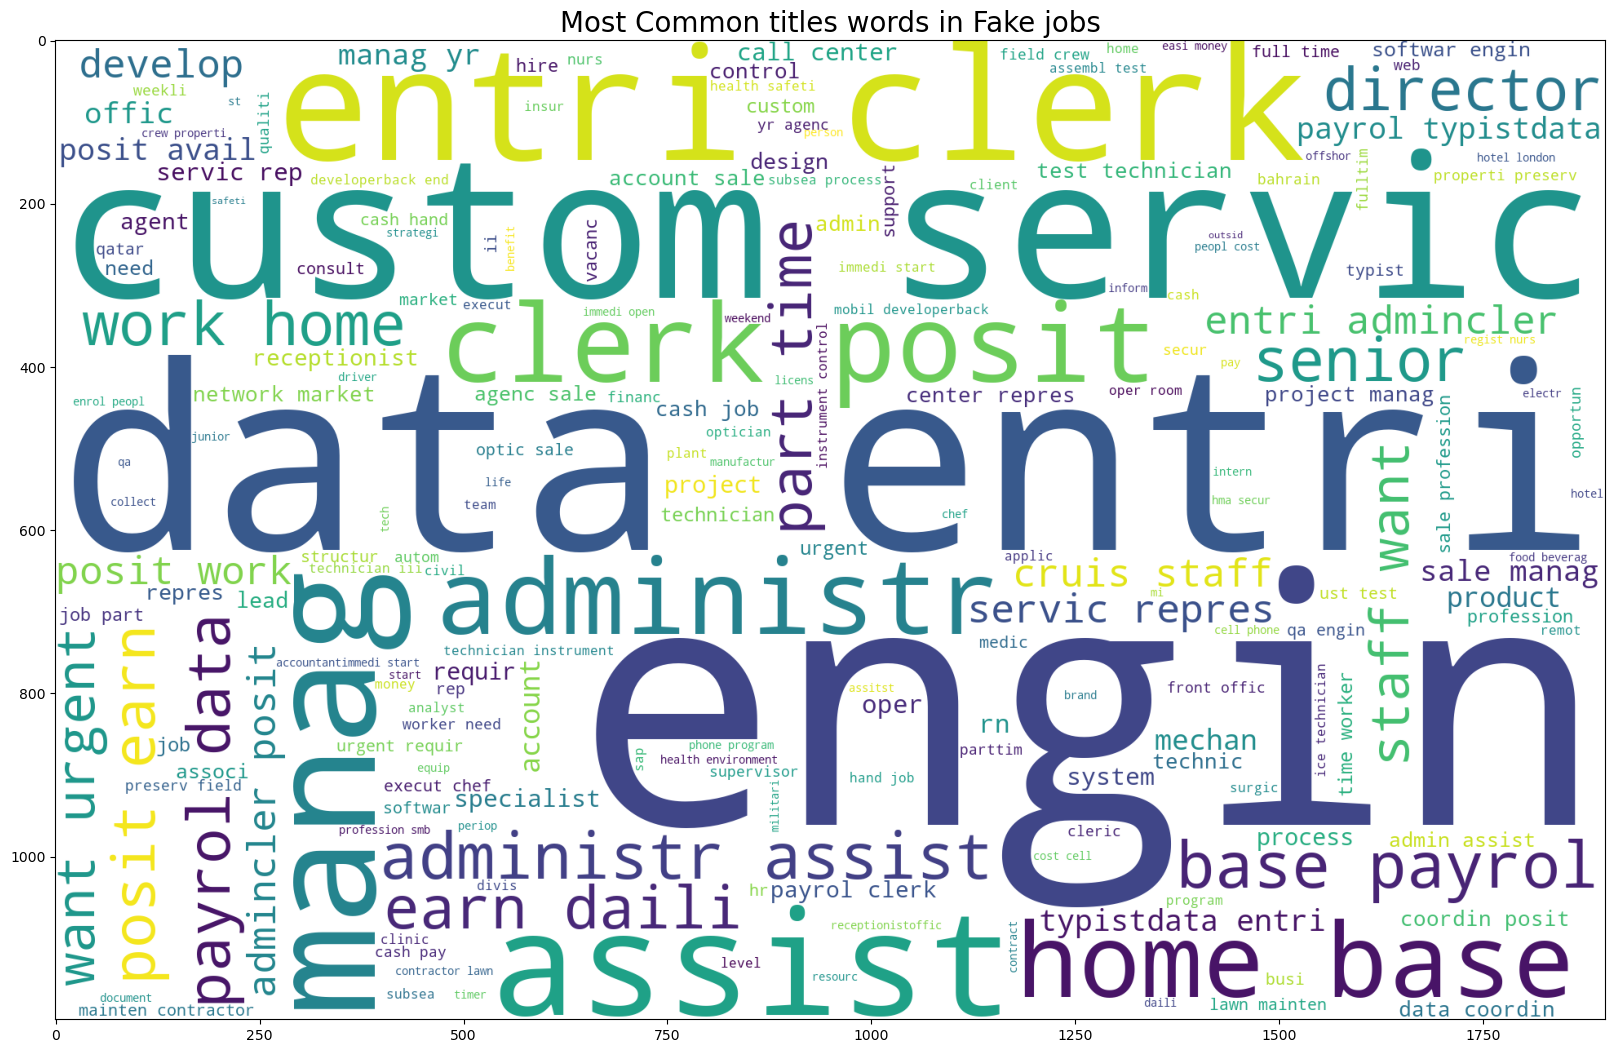

In [50]:
from wordcloud import WordCloud
plt.figure(figsize=(20,15))
wordcloudfraud = WordCloud(width = 1900 , height = 1200 , background_color='white').generate(str(fraud_titles_corpus))
plt.title('Most Common titles words in Fake jobs',size=20)
plt.imshow(wordcloudfraud)

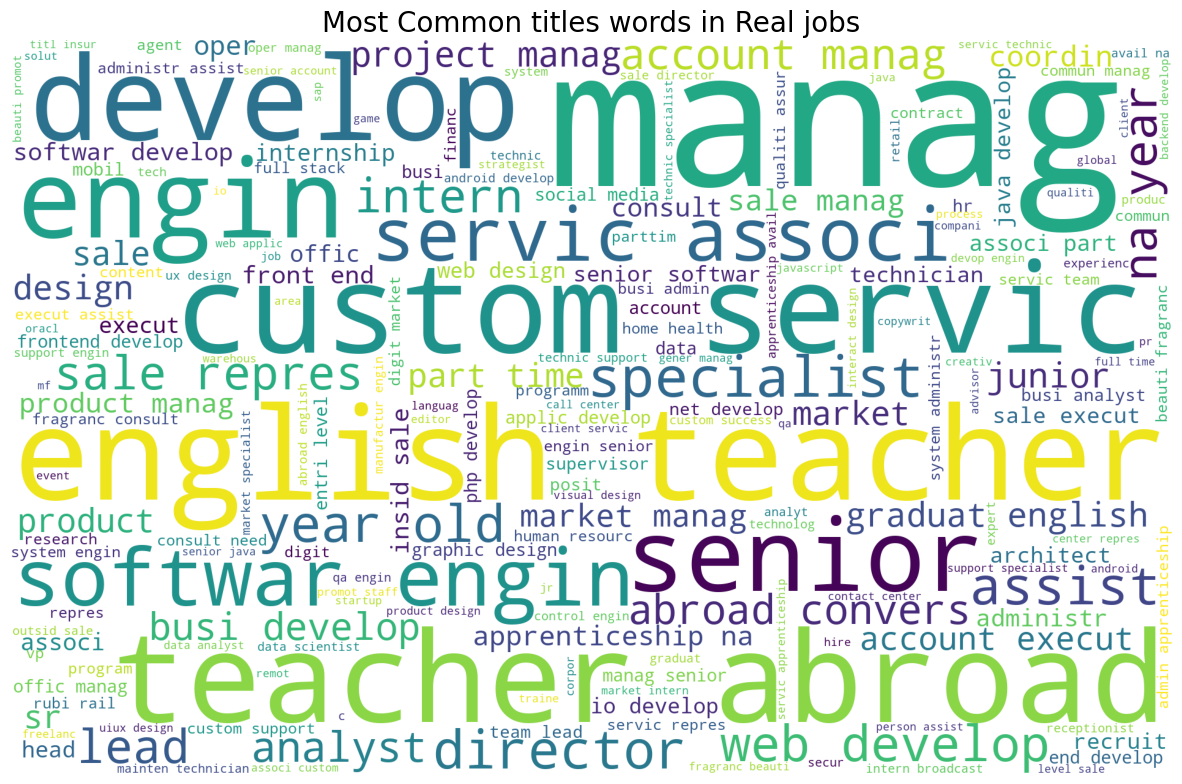

In [51]:
plt.figure(figsize=(15,10))
wordcloudnotfraud=WordCloud(width = 1900 , height = 1200,background_color='white').generate(str(not_fraud_titles_corpus))
plt.axis('off')
plt.title('Most Common titles words in Real jobs',size=20)
plt.imshow(wordcloudnotfraud)

# 



**For "benefits" column**

In [52]:
#Cleaning
txt_fraud['benefits']=txt_fraud['benefits'].apply(column_clean)
txt_not_fraud['benefits']=txt_not_fraud['benefits'].apply(column_clean)

In [53]:
fraud_benefits = txt_fraud['benefits'].apply(combine)
not_fraud_benefits = txt_not_fraud['benefits'].apply(combine)

In [54]:
#Convertinng to list
fraud_benefits_corpus=fraud_benefits.values.tolist()
not_fraud_benefits_corpus=not_fraud_benefits.values.tolist()

**Corpus(collection of text or data) for WordCloud**


In [55]:
fraud_benefits_corpus=' '.join(fraud_benefits_corpus)
not_fraud_benefits_corpus=' '.join(not_fraud_benefits_corpus)

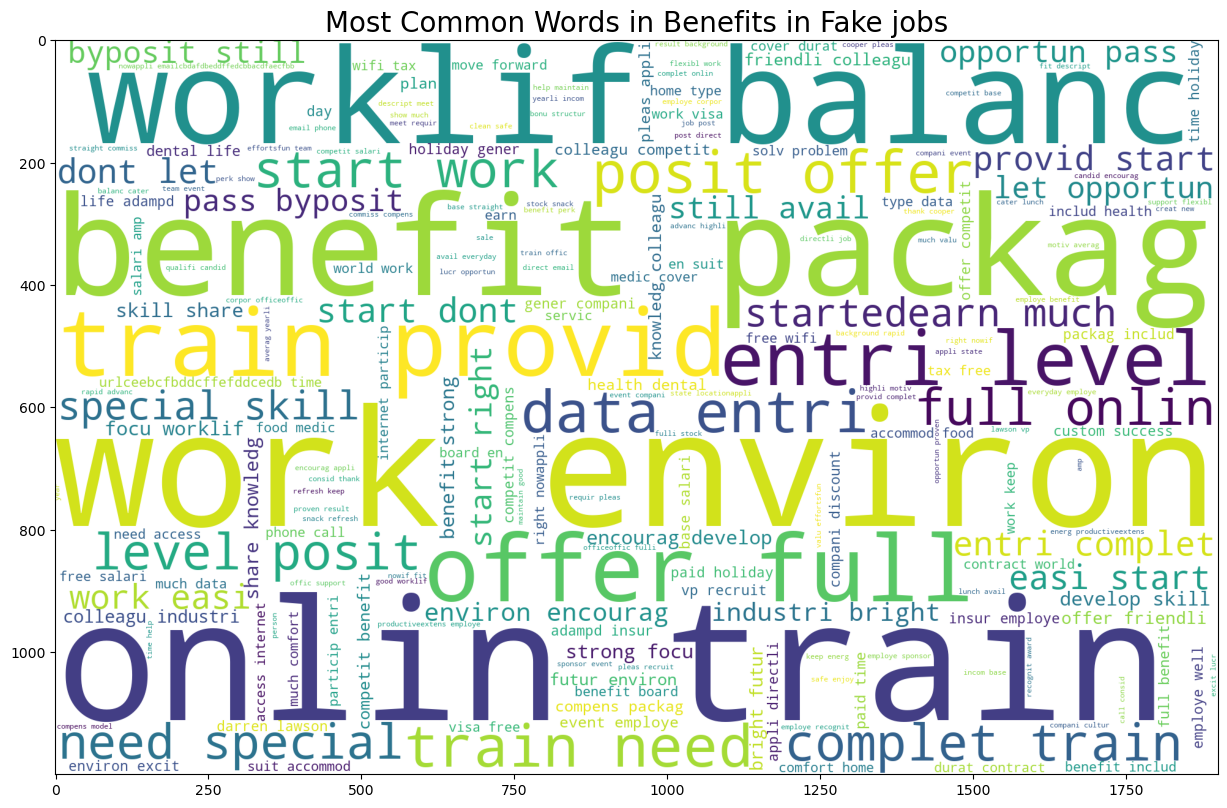

In [56]:
plt.figure(figsize=(15,10))
wordcloud_fraud_ben=WordCloud(width = 1900 , height = 1200,background_color='white').generate(fraud_benefits_corpus)
plt.title('Most Common Words in Benefits in Fake jobs',size=20)
plt.imshow(wordcloud_fraud_ben)

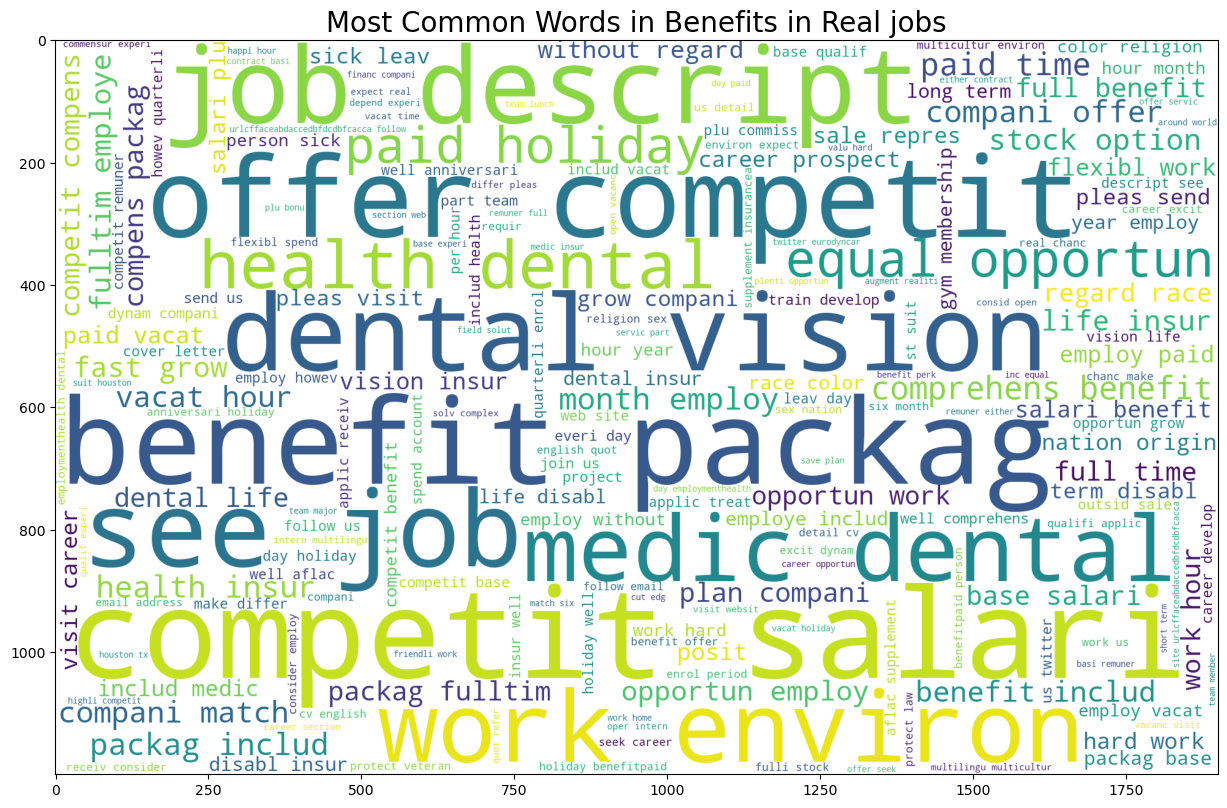

In [57]:
plt.figure(figsize=(15,10))
wordcloud_notfraudben=WordCloud(width = 1900 , height = 1200,background_color='white').generate(not_fraud_benefits_corpus)
plt.title('Most Common Words in Benefits in Real jobs',size=20)
plt.imshow(wordcloud_notfraudben)

# 


**Company_profile**


In [58]:
txt_fraud['company_profile']=txt_fraud['company_profile'].apply(column_clean)
txt_not_fraud['company_profile']=txt_not_fraud['company_profile'].apply(column_clean)

In [59]:
fraud_company = txt_fraud['company_profile'].apply(combine)
not_fraud_company = txt_not_fraud['company_profile'].apply(combine)


In [60]:
fraud_company_corpus=fraud_company.values.tolist()
not_fraud_company_corpus=not_fraud_company.values.tolist()

In [61]:
fraud_company_corpus=' '.join(fraud_company_corpus)
not_fraud_company_corpus=' '.join(not_fraud_company_corpus)

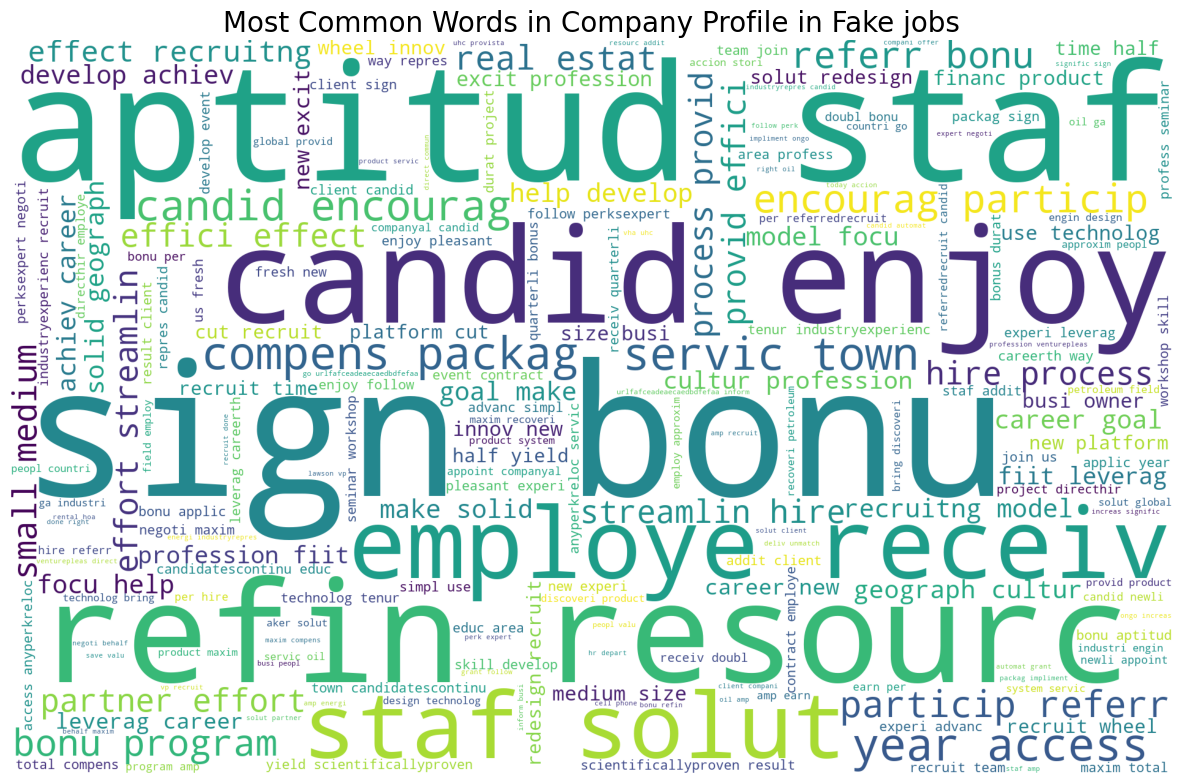

In [62]:
plt.figure(figsize=(15,10))
wordcloud_fraud_company=WordCloud(width = 1900 , height = 1200,background_color='white').generate(fraud_company_corpus)
plt.axis('off')
plt.title('Most Common Words in Company Profile in Fake jobs',size=20)
plt.imshow(wordcloud_fraud_company)

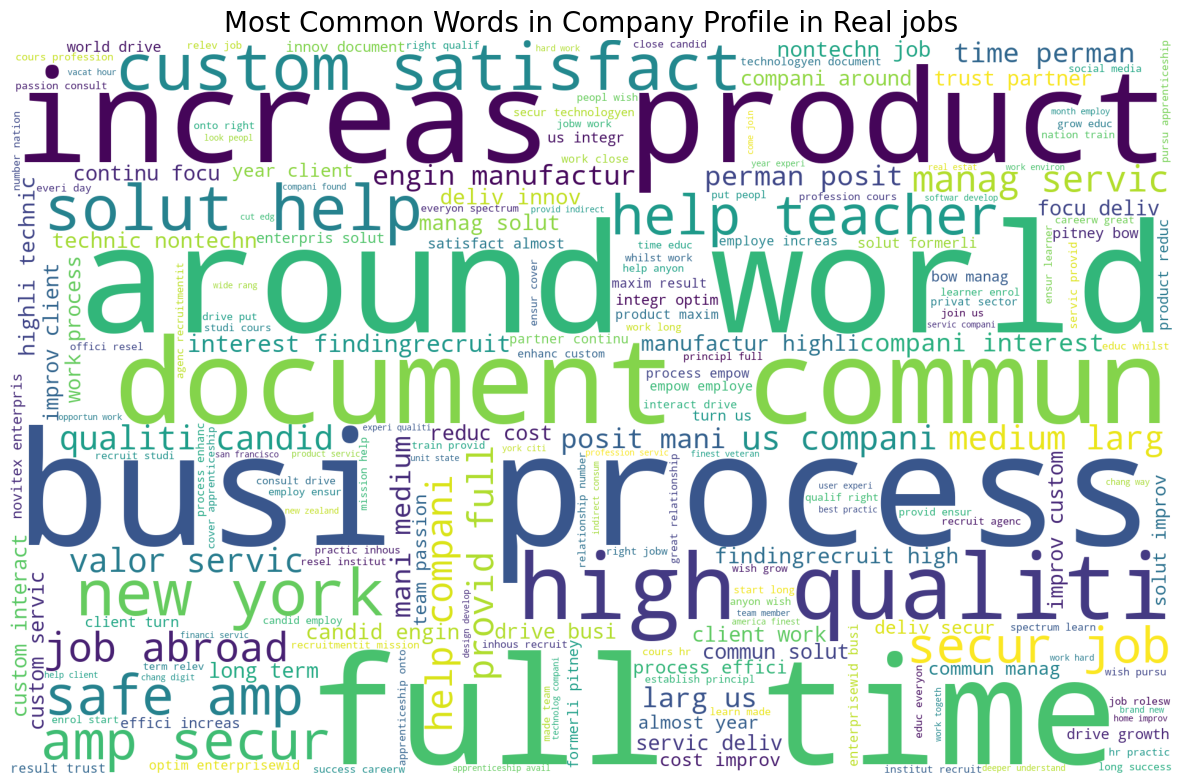

In [63]:
plt.figure(figsize=(15,10))
wordcloud_not_fraud_company=WordCloud(width = 1900 , height = 1200,background_color='white').generate(not_fraud_company_corpus)
plt.axis('off')
plt.title('Most Common Words in Company Profile in Real jobs',size=20)
plt.imshow(wordcloud_not_fraud_company)

# 



In [64]:
data=txt_cols.join(categ_cols.drop(columns='fraudulent'))

In [65]:
data['text']=data['title'] +' '+data['benefits']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']
colm=['title','benefits','company_profile','description','requirements']
data.drop(columns=colm,inplace=True)

In [66]:
def clean(text):
#     text = text.lower()
    text = re.sub('[^a-zA-Z\s*]','',text)
    text=text.split()
    text=[stemmer.stem(word) for word in text if word not in set(stopwords.words('english'))]
    return (text)
    

In [67]:
data['text']=data['text'].apply(clean)

In [68]:
data['text']=data['text'].apply(combine)

# 





In [69]:
X = data.drop(columns='fraudulent')
Y = data['fraudulent']

In [156]:
data.to_excel("D:/Study/rf.xlsx")

In [70]:
print(X)

      employment_type required_experience required_education  \
0               Other          Internship               None   
1           Full-time      Not Applicable               None   
2                None                None               None   
3           Full-time    Mid-Senior level  Bachelor's Degree   
4           Full-time    Mid-Senior level  Bachelor's Degree   
...               ...                 ...                ...   
17875       Full-time    Mid-Senior level               None   
17876       Full-time    Mid-Senior level  Bachelor's Degree   
17877       Full-time                None               None   
17878        Contract      Not Applicable       Professional   
17879       Full-time    Mid-Senior level               None   

                        industry              function  telecommuting  \
0                           None             Marketing              0   
1      Marketing and Advertising      Customer Service              0   
2           

In [71]:
Y.head(2)

0    0
1    0
Name: fraudulent, dtype: int64

In [72]:
#importing CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [73]:
# applying count vectorizer
count_vec = CountVectorizer(max_features=5000)
vec = count_vec.fit_transform(data['text'])

In [74]:
vec

<17880x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 2565458 stored elements in Compressed Sparse Row format>

In [75]:
text=pd.DataFrame(vec.toarray(),columns=count_vec.get_feature_names_out())

In [146]:
print(text.columns)

Index(['aan', 'ab', 'abap', 'abc', 'abil', 'abl', 'about', 'abov', 'abreast',
       'abroad',
       ...
       'zelf', 'zend', 'zendesk', 'zero', 'zijn', 'zingchart', 'zodat', 'zone',
       'zpompano', 'zylun'],
      dtype='object', length=5000)


In [76]:
print(text)

       aan  ab  abap  abc  abil  abl  about  abov  abreast  abroad  ...  zelf  \
0        0   0     0    0     0    0      0     0        0       0  ...     0   
1        0   0     0    0     0    1      0     0        0       0  ...     0   
2        0   0     0    0     0    0      0     0        0       0  ...     0   
3        0   0     0    0     1    0      0     0        0       0  ...     0   
4        0   0     0    0     0    1      0     0        0       0  ...     0   
...    ...  ..   ...  ...   ...  ...    ...   ...      ...     ...  ...   ...   
17875    0   0     0    0     1    0      0     0        0       0  ...     0   
17876    0   0     0    0     2    1      0     0        0       0  ...     0   
17877    0   0     0    0     0    1      0     0        0       0  ...     0   
17878    0   0     0    0     0    2      0     0        0       0  ...     0   
17879    0   0     0    0     0    0      0     0        0       0  ...     0   

       zend  zendesk  zero 

In [77]:
labels=pd.get_dummies(X.drop(columns='text'))
result = pd.concat([labels, text], axis=1)

In [78]:
result

telecommuting  has_company_logo  has_questions  \
0                  0                 1              0   
1                  0                 1              0   
2                  0                 1              0   
3                  0                 1              0   
4                  0                 1              1   
...              ...               ...            ...   
17875              0                 1              1   
17876              0                 1              1   
17877              0                 0              0   
17878              0                 0              1   
17879              0                 1              1   

       employment_type_Contract  employment_type_Full-time  \
0                             0                          0   
1                             0                          1   
2                             0                          0   
3                             0                          1   
4                             0                          1   
...                         ...                        ...   
17875                         0                          1   
17876                         0                          1   
17877                         0                          1   
17878                         1                          0   
17879                         0                          1   

       employment_type_None  employment_type_Other  employment_type_Part-time  \
0                         0                      1                          0   
1                         0                      0                          0   
2                         1                      0                          0   
3                         0                      0                          0   
4                         0                      0                          0   
...                     ...                    ...                        ...   
17875                     0                      0                          0   
17876                     0                      0                          0   
17877                     0                      0                          0   
17878                     0                      0                          0   
17879                     0                      0                          0   

       employment_type_Temporary  required_experience_Associate  ...  zelf  \
0                              0                              0  ...     0   
1                              0                              0  ...     0   
2                              0                              0  ...     0   
3                              0                              0  ...     0   
4                              0                              0  ...     0   
...                          ...                            ...  ...   ...   
17875                          0                              0  ...     0   
17876                          0                              0  ...     0   
17877                          0                              0  ...     0   
17878                          0                              0  ...     0   
17879                          0                              0  ...     0   

       zend  zendesk  zero  zijn  zingchart  zodat  zone  zpompano  zylun  
0         0        0     0     0          0      0     0         0      0  
1         0        0     0     0          0      0     0         0      0  
2         0        0     0     0          0      0     0         0      0  
3         0        0     2     0          0      0     0         0      0  
4         0        0     0     0          0      0     0         1      0  
...     ...      ...   ...   ...        ...    ...   ...       ...    ...  
17875     0        0     0     0          0      0     0         0      0  
17876     0        0     0     0          0      0     0   

# 



# **Spliting the dataset into train and test**

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,Y_train,Y_test=train_test_split(result,Y,test_size=0.2,random_state=42,stratify=Y)

In [113]:
Y_test

16995    0
9357     0
11561    0
1105     0
1980     0
        ..
7039     0
14472    0
14453    0
6296     0
7058     0
Name: fraudulent, Length: 3576, dtype: int64

# 



# Building Models and Evaluation


# 



# Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
lr = LogisticRegression()

In [84]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [85]:
lr_y_pred=lr.predict(X_test)

In [86]:
from sklearn.metrics import precision_score,recall_score

In [87]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report,ConfusionMatrixDisplay

In [88]:
# from sklearn.metrics import plot_confusion_matrix

In [89]:
print('        Training Classification report for Logistic Regression \n',classification_report(Y_train,lr.predict(X_train)))
print('        Testing Classification Report for Logistion Regression \n',classification_report(Y_test,lr_y_pred))




        Training Classification report for Logistic Regression 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      0.99      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

        Testing Classification Report for Logistion Regression 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3403
           1       0.91      0.79      0.84       173

    accuracy                           0.99      3576
   macro avg       0.95      0.89      0.92      3576
weighted avg       0.99      0.99      0.99      3576



In [119]:
# Y_pred = svc.predict(X_test)  
score = accuracy_score(Y_test, lr_y_pred)  
print(score)  

0.985738255033557


# 




# 


# Naive Bayes

In [130]:
from sklearn.naive_bayes import MultinomialNB

In [131]:
nb=MultinomialNB()

In [132]:
nb.fit(X_train,Y_train)

MultinomialNB()

In [133]:
nb_y_pred=nb.predict(X_test)

In [134]:
print('        Training Classification report for Naive Bayes \n',classification_report(Y_train,nb.predict(X_train)))
print('        Testing Classification Report for Naive Bayes \n',classification_report(Y_test,nb_y_pred))

        Training Classification report for Naive Bayes 
               precision    recall  f1-score   support

           0       0.99      0.92      0.95     13611
           1       0.36      0.90      0.51       693

    accuracy                           0.92     14304
   macro avg       0.68      0.91      0.73     14304
weighted avg       0.96      0.92      0.93     14304

        Testing Classification Report for Naive Bayes 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      3403
           1       0.38      0.88      0.54       173

    accuracy                           0.93      3576
   macro avg       0.69      0.90      0.75      3576
weighted avg       0.96      0.93      0.94      3576



****

In [135]:
score_nb = accuracy_score(Y_test, nb_y_pred)  
print(score_nb)  

0.9261744966442953


# 


# 

# K-Nearest Neighbour

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn = KNeighborsClassifier() 

In [102]:
knn.fit(X_train,Y_train)

ValueError: Unknown label type: continuous-multioutput. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
# pip install numpy --upgrade

In [96]:
pip show numpy

Name: numpy
Version: 1.25.1
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: d:\anaconda\lib\site-packages
Requires: 
Required-by: astropy, blis, bokeh, Bottleneck, contourpy, daal4py, datashader, datashape, gensim, h5py, holoviews, hvplot, imagecodecs, imageio, imbalanced-learn, matplotlib, mkl-fft, mkl-random, numba, numexpr, pandas, patsy, pyerfa, PyWavelets, scikit-image, scikit-learn, scipy, seaborn, spacy, statsmodels, tables, thinc, tifffile, transformers, wordcloud, xarray
Note: you may need to restart the kernel to use updated packages.


In [106]:
knn_y_pred=knn.predict(X_test)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [107]:
X_test.columns

Index(['telecommuting', 'has_company_logo', 'has_questions',
       'employment_type_Contract', 'employment_type_Full-time',
       'employment_type_None', 'employment_type_Other',
       'employment_type_Part-time', 'employment_type_Temporary',
       'required_experience_Associate',
       ...
       'zelf', 'zend', 'zendesk', 'zero', 'zijn', 'zingchart', 'zodat', 'zone',
       'zpompano', 'zylun'],
      dtype='object', length=5853)

In [ ]:
K = X_test[['telecommuting', 'has_company_logo', 'has_questions',
       'employment_type_Contract', 'employment_type_Full-time',
       'employment_type_None', 'employment_type_Other',
       'employment_type_Part-time', 'employment_type_Temporary',
       'required_experience_Associate',
       'zelf', 'zend', 'zendesk', 'zero', 'zijn', 'zingchart', 'zodat', 'zone',
       'zpompano', 'zylun']].values

In [110]:
print(K)

[[0 1 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]]


In [111]:
knn_y_pred=knn.predict(X)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [98]:
np.shape(X_test)

(3576, 5853)

# 


# 

# Decision Tree

In [139]:
from sklearn.tree import DecisionTreeClassifier

In [140]:
dt = DecisionTreeClassifier()

In [141]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [142]:
dt_y_pred=dt.predict(X_test)

In [143]:
print('        Training Classification report for Decision Tree Classifier \n',classification_report(Y_train,dt.predict(X_train)))
print('        Testing Classification Report for Decision Tree Classifier \n',classification_report(Y_test,dt_y_pred))

        Training Classification report for Decision Tree Classifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      1.00      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

        Testing Classification Report for Decision Tree Classifier 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.79      0.75      0.77       173

    accuracy                           0.98      3576
   macro avg       0.89      0.87      0.88      3576
weighted avg       0.98      0.98      0.98      3576



In [144]:
score_dt = accuracy_score(Y_test, dt_y_pred)  
print(score_dt)  

0.9779082774049217
